# Calcul Matriciel, Optimisation

Tous les programmes python faisant des calculs utilisent une librairie dédiée car python est trop lent. La plus simple des options est [numpy](https://numpy.org/). Avec l'avènement du deep learning, d'autres ont émergé offrant de faire des calculs dans des environnements plus variés ([CPU](https://en.wikipedia.org/wiki/Central_processing_unit), [GPU](https://en.wikipedia.org/wiki/Graphics_processing_unit), ...). [pytorch](https://pytorch.org/) est une des plus connues.

Avec l'émergence du deep learning en open source, l'usage de ces librairies s'est standardisé. Ce qui est vrai pour numpy l'est aussi pour pytorch. Les opérations ont le même sens, les fonctions ont presque toujours les mêmes noms.

In [1]:
%matplotlib inline

### Numpy arrays

La convention d'import classique de numpy est la suivante:

In [2]:
import numpy as np

#### Creation d'un array: notion de datatype, et dimensions

On part d'une liste python contenant des entiers. On peut créer un [array](http://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html) numpy à partir de cette liste. 
Cet array possède des attributs indiquant le data type, le nombre de dimensions de l'array, etc...

In [3]:
l = [1, 42, 18]
a = np.array(l)
print(a)
print(a.dtype)
print(a.ndim)
print(a.shape)
print(a.size)
a

[ 1 42 18]
int64
1
(3,)
3


array([ 1, 42, 18])

On peut indiquer explicitement le [dtype](http://docs.scipy.org/doc/numpy/reference/generated/numpy.dtype.html) lors de la création de l'array. Sinon, Numpy sélectionne automatiquement le [dtype](http://docs.scipy.org/doc/numpy/reference/generated/numpy.dtype.html).
Numpy ajoute un grand nombre de [dtype](http://docs.scipy.org/doc/numpy/reference/generated/numpy.dtype.html) à ceux de Python. Allez jeter un oeil à la [liste](http://docs.scipy.org/doc/numpy/user/basics.types.html). 

In [4]:
b = np.array(l, dtype=float)
print(b)
print(b.dtype)

[ 1. 42. 18.]
float64


In [5]:
l[0] = 1.0
bb = np.array(l)
print(bb)
print(bb.dtype)

[ 1. 42. 18.]
float64


Assigner un float dans un array de type int va caster le float en int, et ne modifie pas le [dtype](http://docs.scipy.org/doc/numpy/reference/generated/numpy.dtype.html) de l'array.

In [6]:
a[0] = 2.5
a

array([ 2, 42, 18])

On peut forcer le casting dans un autre type avec [astype](http://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.astype.html) :

In [7]:
aa = a.astype(float)
aa[0] = 2.5
aa

array([ 2.5, 42. , 18. ])

A partir d'une liste de listes, on obtient un array bi-dimmensionnel.

On peut le transposer ou encore l'aplatir en un array 1d

In [8]:
c = np.array([range(5), range(5, 10), range(5)])
print(c)
print("ndim:{}".format(c.ndim))
print("shape:{}".format(c.shape))
print(c.transpose())  # same as c.T
print("shape transposed:{}".format(c.T.shape))
print(c.flatten())
print("ndim flattened:{}".format(c.flatten().ndim))

[[0 1 2 3 4]
 [5 6 7 8 9]
 [0 1 2 3 4]]
ndim:2
shape:(3, 5)
[[0 5 0]
 [1 6 1]
 [2 7 2]
 [3 8 3]
 [4 9 4]]
shape transposed:(5, 3)
[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4]
ndim flattened:1


#### Indexation, Slicing, Fancy indexing

In [9]:
print(c)

[[0 1 2 3 4]
 [5 6 7 8 9]
 [0 1 2 3 4]]


L'indexation des array multidimensionnels fonctionne avec des tuples.

La syntaxe ``':'`` permet d'obtenir tous les éléments de la dimension.

In [10]:
print(c[1, 3])
print(c[1, :3])
print(c[:, 4])

8
[5 6 7]
[4 9 4]


Si on utilise pas un couple sur un array 2d on récupère un array 1d

In [11]:
print(c[1], c[1].shape)
print(c[1][:3])

[5 6 7 8 9] (5,)
[5 6 7]


On peut aussi utiliser l'indexation par un array (ou une liste python) de booléens ou d'entiers (un mask). Cela s'appelle le fancy indexing. Un mask d'entiers permet de désigner les éléments que l'on souhaite extraire via la liste de leurs indices, on peut aussi répéter l'indice d'un élément pour répéter l'élement dans l'array que l'on extrait.

In [12]:
ar = np.arange(1, 10)  # arange est l'equivalent de range mais retourne un numpy array
print("ar = ", ar)
idx = np.array([1, 4, 3, 2, 1, 7, 3])
print("idx = ", idx)
print("ar[idx] =", ar[idx])
print("######")
idx_bool = np.ones(ar.shape, dtype=bool)
idx_bool[idx] = False
print("idx_bool = ", idx_bool)
print("ar[idx_bool] = ", ar[idx_bool])
print("######", "Que se passe-t-il dans chacun des cas suivants?", "######")
try:
    print(
        "ar[np.array([True, True, False, True])] = ",
        ar[np.array([True, True, False, True])],
    )
except Exception as e:
    # l'expression ar[[True, True, False, True]] déclenche une erreur depuis numpy 1.13
    print("Erreur", e)

ar =  [1 2 3 4 5 6 7 8 9]
idx =  [1 4 3 2 1 7 3]
ar[idx] = [2 5 4 3 2 8 4]
######
idx_bool =  [ True False False False False  True  True False  True]
ar[idx_bool] =  [1 6 7 9]
###### Que se passe-t-il dans chacun des cas suivants? ######
Erreur boolean index did not match indexed array along dimension 0; dimension is 9 but corresponding boolean dimension is 4


Pourquoi parle-t-on de fancy indexing? Essayez d'indexer des listes python de la même manière...

In [13]:
list_python = range(10)
try:
    list_python[[True, True, False, True]]  # déclenche une exception
except TypeError as e:
    print(e)

range indices must be integers or slices, not list


In [14]:
try:
    list_python[[2, 3, 2, 7]]  # déclenche une exception
except TypeError as e:
    print(e)

range indices must be integers or slices, not list


#### View contre Copy

Créons un array $d$. En plus de renvoyer directement un array, la fonction [arange](http://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html) permet aussi d'utiliser un step flottant. (Essayer avec le range de python pour voir)

In [15]:
d = np.arange(1, 6, 0.5)
d

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5])

Un point important est que l'on ne recopie pas un array lorsqu'on effectue une assignation ou un slicing d'un array.
On travaille dans ce cas avec une View sur l'array d'origine (shallow copy). Toute modification sur la View affecte l'array d'origine.

Dans l'exemple qui suit, $e$ est une view sur $d$. Lorsqu'on modifie $e$, $d$ aussi est modifié. (Remarquez au passage que numpy fournit quelques constantes bien pratiques....)

In [16]:
e = d
e[[0, 2, 4]] = -np.pi
e

array([-3.14159265,  1.5       , -3.14159265,  2.5       , -3.14159265,
        3.5       ,  4.        ,  4.5       ,  5.        ,  5.5       ])

In [17]:
d

array([-3.14159265,  1.5       , -3.14159265,  2.5       , -3.14159265,
        3.5       ,  4.        ,  4.5       ,  5.        ,  5.5       ])

Si on ne veut pas modifier $d$ indirectement, il faut travailler sur une copie de $d$ ([deep copy](https://docs.python.org/3.4/library/copy.html#copy.deepcopy)).

In [18]:
d = np.linspace(
    1, 5.5, 10
)  # Question subsidiaire: en quoi est-ce différent de np.arange avec un step float?
f = d.copy()
f[:4] = -np.e  # il s'agit du nombre d'euler, pas de l'array e ;)
print(f)
print(d)

[-2.71828183 -2.71828183 -2.71828183 -2.71828183  3.          3.5
  4.          4.5         5.          5.5       ]
[1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5]


Ce point est important car source classique d'erreurs silencieuses: les erreurs les plus vicieuses car l'output sera faux mais python ne râlera pas...

Il faut un peu de temps pour s'habituer mais on finit par savoir de manière naturelle quand on travaille sur une view, quand on a besoin de faire une copie explicitement, etc... En tout cas, vérifiez vos sorties, faites des tests de cohérence, cela ne nuit jamais.

Retenez par exemple que le [slicing](http://docs.scipy.org/doc/numpy/reference/arrays.indexing.html#basic-slicing-and-indexing) vous renvoie une view sur l'array, alors que le [fancy indexing](https://scipy-lectures.github.io/intro/numpy/array_object.html#fancy-indexing) effectue une copie.

(Au passage, remarquez le [NaN](http://docs.scipy.org/doc/numpy/reference/generated/numpy.isnan.html) (=NotaNumber) déjà introduit lors de la séance 1 sur pandas qui est un module basé sur numpy)

In [19]:
print("d = ", d)
slice_of_d = d[2:5]
print("\nslice_of_d = ", slice_of_d)
slice_of_d[0] = np.nan
print("\nd = ", d)
mask = np.array([2, 3, 4])
fancy_indexed_subarray = d[mask]
print("\nfancy_indexed_subarray = ", fancy_indexed_subarray)
fancy_indexed_subarray[0] = -2
print("\nd = ", d)

d =  [1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5]

slice_of_d =  [2.  2.5 3. ]

d =  [1.  1.5 nan 2.5 3.  3.5 4.  4.5 5.  5.5]

fancy_indexed_subarray =  [nan 2.5 3. ]

d =  [1.  1.5 nan 2.5 3.  3.5 4.  4.5 5.  5.5]


#### Manipulation de shape

La méthode reshape permet de changer la forme de l'array. Il existe de nombreuses [manipulations possibles](http://docs.scipy.org/doc/numpy/reference/routines.array-manipulation.html).

On précise à [reshape](http://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html) la forme souhaitée: par un entier si on veut un array 1d de cette longueur, ou un couple pour un array 2d de cette forme.

In [20]:
g = np.arange(12)
print(g)
g.reshape((4, 3))

[ 0  1  2  3  4  5  6  7  8  9 10 11]


array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

Par défaut, [reshape](http://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html) utilise l'énumération dans l'ordre du langage C (aussi appelé "row first" ), on peut préciser que l'on souhaite utiliser l'ordre de [Fortran](https://fr.wikipedia.org/wiki/Fortran) ("column first"). Ceux qui connaissent Matlab et R sont habitués à l'ordre "column-first". [Voir l'article wikipedia](http://en.wikipedia.org/wiki/Row-major_order)

In [21]:
g.reshape((4, 3), order="F")

array([[ 0,  4,  8],
       [ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11]])

On peut utiliser -1 sur une dimension, cela sert de joker: numpy infère la dimension nécessaire ! On peut créer directement des matrices de 0 et de 1 à la dimension d'un autre array.

In [22]:
np.zeros_like(g)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [23]:
np.ones_like(g)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

On peut aussi concatener ou stacker [horizontalement](http://docs.scipy.org/doc/numpy/reference/generated/numpy.hstack.html)/[verticalement](http://docs.scipy.org/doc/numpy/reference/generated/numpy.vstack.html) différents arrays.

In [24]:
np.concatenate(
    (g, np.zeros_like(g))
)  # Attention à la syntaxe: le type d'entrée est un tuple!

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0])

In [25]:
gmat = g.reshape((1, len(g)))
np.concatenate((gmat, np.ones_like(gmat)), axis=0)

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1]])

In [26]:
np.concatenate((gmat, np.ones_like(gmat)), axis=1)

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1]])

In [27]:
np.hstack((g, g))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,
        5,  6,  7,  8,  9, 10, 11])

In [28]:
np.vstack((g, g))

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]])

### Exercice 1: Echiquier et Crible d'Erathosthène

* Exercice 1-A Echiquier: Créer une matrice échiquier (des 1 et des 0 alternés) de taille 8x8, de deux façons différentes
    * en vous servant de slices 
    * en vous servant de la fonction [tile](http://docs.scipy.org/doc/numpy/reference/generated/numpy.tile.html#numpy.tile)
* Exercice 1-B Piège lors d'une extraction 2d:
    * Définir la matrice $M = \left(\begin{array}{ccccc} 1 & 5 & 9 & 13 & 17 \\ 2 & 6 & 10 & 14 & 18 \\ 3 & 7 & 11 & 15 & 19 \\ 4 & 8 & 12 & 16 & 20 \\ \end{array}\right)$
    * En **extraire** la matrice $\left(\begin{array}{ccc} 6 & 18 & 10 \\ 7 & 19 & 11 \\ 5 & 17 & 9 \\ \end{array}\right)$
* Exercice 1-C Crible d'Erathosthène: On souhaite implémenter un [crible d'Erathosthène](http://fr.wikipedia.org/wiki/Crible_d'%C3%89ratosth%C3%A8ne) pour trouver les nombres premiers inférieurs à $N=1000$.
    * partir d'un array de booléens de taille N+1, tous égaux à True.
    * Mettre 0 et 1 à False car ils ne sont pas premiers
    * pour chaque entier $k$ entre 2 et $\sqrt{N}$: 
        * si $k$ est premier: on passe ses multiples (entre $k^2$ et $N$) à False
    * on print la liste des entiers premiers

In [29]:
# Exo1a-1:

# Exo1a-2:

In [30]:
# Exo1B:

In [31]:
# Exo1C:

### Manipulation et Opérations sur les arrays

Il existe un très grand nombre de [routines pour manipuler les arrays numpy](http://docs.scipy.org/doc/numpy/reference/routines.html): 
Vous trouverez sans doute utiles les pages spécifiques aux routines de [stats](http://docs.scipy.org/doc/numpy/reference/routines.statistics.html) ou de [maths](http://docs.scipy.org/doc/numpy/reference/routines.math.html)

#### Opérations élément par élément

On déclare $a$ et $b$ sur lesquelles nous allons illustrer quelques opérations

In [32]:
a = np.ones((3, 2))
b = np.arange(6).reshape(a.shape)
print(a)
b

[[1. 1.]
 [1. 1.]
 [1. 1.]]


array([[0, 1],
       [2, 3],
       [4, 5]])

Les opérations arithmétiques avec les scalaires, ou entre arrays s'effectuent élément par élément.
Lorsque le dtype n'est pas le même ($a$ contient des float, $b$ contient des int), numpy adopte le type le plus "grand" (au sens de l'inclusion).


In [33]:
print((a + b) ** 2)
print(np.abs(3 * a - b))
f = lambda x: np.exp(x - 1)
print(f(b))

[[ 1.  4.]
 [ 9. 16.]
 [25. 36.]]
[[3. 2.]
 [1. 0.]
 [1. 2.]]
[[ 0.36787944  1.        ]
 [ 2.71828183  7.3890561 ]
 [20.08553692 54.59815003]]


Remarquez que la division par zéro ne provoque pas d'erreur mais introduit la valeur [inf](http://docs.scipy.org/doc/numpy/reference/generated/numpy.isinf.html) :

In [34]:
b

array([[0, 1],
       [2, 3],
       [4, 5]])

In [35]:
1 / b

/tmp/ipykernel_30564/2601360242.py:1: RuntimeWarning: divide by zero encountered in divide
  1 / b


array([[       inf, 1.        ],
       [0.5       , 0.33333333],
       [0.25      , 0.2       ]])

#### Broadcasting

Que se passe-t-il si les dimensions sont différentes?

In [36]:
c = np.ones(6)
c

array([1., 1., 1., 1., 1., 1.])

In [37]:
try:
    b + c  # déclenche une exception
except ValueError as e:
    print(e)

operands could not be broadcast together with shapes (3,2) (6,) 


In [38]:
c = np.arange(3).reshape((3, 1))
print(b, c, sep="\n")
b + c

[[0 1]
 [2 3]
 [4 5]]
[[0]
 [1]
 [2]]


array([[0, 1],
       [3, 4],
       [6, 7]])

L'opération précédente fonctionne car numpy effectue ce qu'on appelle un [broadcasting](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) de ``c`` : une dimension étant commune, tout se passe comme si on dupliquait c sur la dimension non-partagée avec b. (voir aussi [Broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html)) :

In [39]:
a = np.zeros((3, 3))
a[:, 0] = -1
b = np.array(range(3))
print(a + b)

[[-1.  1.  2.]
 [-1.  1.  2.]
 [-1.  1.  2.]]


Par contre, il peut parfois être utile de préciser la dimension sur laquelle on souhaite broadcaster, on ajoute alors explicitement une dimension :

In [40]:
print(b.shape)
print(b[:, np.newaxis].shape)
print(b[np.newaxis, :].shape)

(3,)
(3, 1)
(1, 3)


In [41]:
print(a + b[np.newaxis, :])
print(a + b[:, np.newaxis])
print(b[:, np.newaxis] + b[np.newaxis, :])
print(b + b)

[[-1.  1.  2.]
 [-1.  1.  2.]
 [-1.  1.  2.]]
[[-1.  0.  0.]
 [ 0.  1.  1.]
 [ 1.  2.  2.]]
[[0 1 2]
 [1 2 3]
 [2 3 4]]
[0 2 4]


#### Réductions

On parle de réductions lorsque l'opération réduit la dimension de l'array.
Il en existe un grand nombre. Elles existent souvent sous forme de fonction de numpy ou de méthodes d'un array numpy.
On n'en présente que quelques unes, mais le principe est le même : par défaut elles opèrent sur toutes les dimensions, mais on peut via l'argument *axis* préciser la dimension selon laquelle on souhaite effectuer la réduction.

In [42]:
c = np.arange(10).reshape((2, -1))  # Note: -1 is a joker!
print(c)
print(c.sum())
print(c.sum(axis=0))
print(np.sum(c, axis=1))

[[0 1 2 3 4]
 [5 6 7 8 9]]
45
[ 5  7  9 11 13]
[10 35]


In [43]:
print(np.all(c[0] < c[1]))
print(c.min(), c.max())
print(c.min(axis=1))

True
0 9
[0 5]


### Algèbre linéaire

Vous avez un éventail de fonctions pour faire de l'algèbre linéaire dans [numpy](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html) ou dans [scipy](http://docs.scipy.org/doc/scipy/reference/linalg.html).
Cela peut vous servir si vous cherchez à faire une décomposition matricielle particulière ([LU](http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.linalg.lu.html), [QR](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.qr.html), [SVD](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html),...), si vous vous intéressez aux valeurs propres d'une matrice, etc...

#### Exemples simples

Commençons par construire deux arrays 2d correspondant à une matrice triangulaire inférieure et une matrice diagonale :

In [44]:
A = np.tril(np.ones((3, 3)))
A

array([[1., 0., 0.],
       [1., 1., 0.],
       [1., 1., 1.]])

In [45]:
b = np.diag([1, 2, 3])
b

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

On a vu que les multiplications entre array s'effectuaient élément par élement.
Si l'on souhaite faire des multiplications matricielles, il faut utiliser la fonction [dot](http://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html). La version 3.5 introduit un nouvel opérateur [@](https://docs.python.org/3.6/whatsnew/3.5.html#pep-465-a-dedicated-infix-operator-for-matrix-multiplication) qui désigne explicitement la multiplication matricielle.

In [46]:
print(A.dot(b))
print(A * b)
print(A.dot(A))

[[1. 0. 0.]
 [1. 2. 0.]
 [1. 2. 3.]]
[[1. 0. 0.]
 [0. 2. 0.]
 [0. 0. 3.]]
[[1. 0. 0.]
 [2. 1. 0.]
 [3. 2. 1.]]


On peut calculer l'inverse ou le déterminant de $A$

In [47]:
print(np.linalg.det(A))
inv_A = np.linalg.inv(A)
print(inv_A)
print(inv_A.dot(A))

1.0
[[ 1.  0.  0.]
 [-1.  1.  0.]
 [ 0. -1.  1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


... résoudre des systèmes d'equations linéaires du type $Ax = b$...

In [48]:
x = np.linalg.solve(A, np.diag(b))
print(np.diag(b))
print(x)
print(A.dot(x))

[1 2 3]
[1. 1. 1.]
[1. 2. 3.]


... ou encore obtenir les valeurs propres de $A$.

In [49]:
np.linalg.eig(A)

EigResult(eigenvalues=array([1., 1., 1.]), eigenvectors=array([[ 0.00000000e+00,  0.00000000e+00,  4.93038066e-32],
       [ 0.00000000e+00,  2.22044605e-16, -2.22044605e-16],
       [ 1.00000000e+00, -1.00000000e+00,  1.00000000e+00]]))

In [50]:
np.linalg.eigvals(A)

array([1., 1., 1.])

#### Numpy Matrix

[Matrix](http://docs.scipy.org/doc/numpy/reference/generated/numpy.matrix.html) est une sous classe spécialisée pour le calcul matriciel. Il s'agit d'un array numpy 2d qui conserve sa dimension 2d à travers les opérations. Pensez aux différences que cela implique...
On peut les construire classiquement depuis les array ou les objets pythons, ou via une string à la Matlab ( où les points virgules indiquent les lignes).

In [51]:
m = np.matrix(" 1 2 3; 4 5 6; 7 8 9")
a = np.arange(1, 10).reshape((3, 3))
print(m)
print(a)
print(m[0], a[0])
print(m[0].shape, a[0].shape)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1 2 3]] [1 2 3]
(1, 3) (3,)


Matrix surcharge par ailleurs les opérateurs \* et \** pour remplacer les opérations élément par élément par les opérations matricielles.
Enfin, une Matrix possède des attributs supplémentaires. Notamment, Matrix.I qui désigne l'inverse, Matrix.A l'array de base. 

*Il est probable que cela évolue puisque Python 3.5 a introduit le symbol ``@`` pour la multiplication matricielle.*

In [52]:
m * m

matrix([[ 30,  36,  42],
        [ 66,  81,  96],
        [102, 126, 150]])

In [53]:
a * a

array([[ 1,  4,  9],
       [16, 25, 36],
       [49, 64, 81]])

In [54]:
m * a  # La priorité des matrix est plus importantes que celles des arrays

matrix([[ 30,  36,  42],
        [ 66,  81,  96],
        [102, 126, 150]])

In [55]:
print(m**2)
print(a**2)

[[ 30  36  42]
 [ 66  81  96]
 [102 126 150]]
[[ 1  4  9]
 [16 25 36]
 [49 64 81]]


La syntaxe est plus légère pour effectuer du calcul matriciel

In [56]:
m[0, 0] = -1
print("det", np.linalg.det(m), "rank", np.linalg.matrix_rank(m))
print(m.I * m)
a[0, 0] = -1
print("det", np.linalg.det(a), "rank", np.linalg.matrix_rank(a))
print(a.dot(np.linalg.inv(a)))

det 6.000000000000016 rank 3
[[ 1.00000000e+00 -2.22044605e-15 -3.77475828e-15]
 [ 0.00000000e+00  1.00000000e+00  7.10542736e-15]
 [ 8.88178420e-16  0.00000000e+00  1.00000000e+00]]
det 6.000000000000016 rank 3
[[ 1.00000000e+00  2.66453526e-15 -8.88178420e-16]
 [ 0.00000000e+00  1.00000000e+00  1.77635684e-15]
 [ 0.00000000e+00  8.88178420e-16  1.00000000e+00]]


### Génération de nombres aléatoires et statistiques

Le module [numpy.random](https://numpy.org/doc/stable/reference/random/index.html) apporte à python la possibilité de générer un échantillon de taille $n$ directement, alors que le module natif de python ne produit des tirages que un par un. Le module [https://numpy.org/doc/stable/reference/random/index.html#module-numpy.randomnumpy.random](https://numpy.org/doc/stable/reference/random/index.html) est donc bien plus efficace si on veut tirer des échantillon conséquents. Par ailleurs, [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) fournit des méthodes pour un très grand nombre de distributions et quelques fonctions classiques de statistiques. 

Par exemple, on peut obtenir un array 4x3 de tirages gaussiens standard (soit en utilisant [*randn*](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html) ou [*normal*](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html#numpy.random.normal)):

In [57]:
np.random.randn(4, 3)

array([[-0.77945981, -0.60547667, -1.00785723],
       [ 0.02571444,  1.75133322, -1.12540479],
       [-1.49532729, -0.98663122, -0.57854294],
       [-1.48654912,  0.80767114,  1.28940232]])

Pour se convaincre que `numpy.random` est plus efficace que le module `random` de base de python. On effectue un grand nombre de tirages gaussiens standard, en python pur et via numpy.

In [58]:
N = int(1e6)
from random import normalvariate

%timeit [normalvariate(0,1) for _ in range(N)]

781 ms ± 70 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [59]:
%timeit np.random.randn(N)

25.9 ms ± 2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Exercice 2 : marches aléatoires

Simulez (**en une seule fois!**) 10000 marches aléatoires de taille 1000, partant de 0 et de pas +1 ou -1 équiprobables 

* Faites un graphe représentant la racine de la moyenne des carrés des positions (=cumul des pas à un instant donné) en fonction du temps
* Quels sont les amplitudes maximales et minimales atteintes parmi l'ensemble des marches aléatoires?
* Combien de marches s'éloigne de plus de 50 de l'origine?
* Parmi celles qui le font, quelle est la moyenne des temps de passage (i.e. le premier moment où ces marches dépassent +/-50)?

Vous aurez peut-être besoin des fonctions suivantes: [np.abs](http://docs.scipy.org/doc/numpy/reference/generated/numpy.absolute.html), [np.mean](http://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html), [np.max](http://docs.scipy.org/doc/numpy/reference/generated/numpy.maximum.html), [np.where](http://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html), [np.argmax](http://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html), [np.any](http://docs.scipy.org/doc/numpy/reference/generated/numpy.any.html), [np.cumsum](http://docs.scipy.org/doc/numpy/reference/generated/numpy.cumsum.html), [np.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html).

### Exercice 3 : retrouver la série aléatoire à partir des marches aléatoires

L'exercice précédent montre comment générer une marche aléatoire à partir d'une série temporelle aléatoire. Comment retrouver la série initiale à partir de la marche aléatoire ?

### Optimisation avec scipy

Le module [scipy.optimize](http://docs.scipy.org/doc/scipy/reference/optimize.html) fournit un panel de méthodes d'optimisation. En fonction du problème que vous souhaitez résoudre, il vous faut choisir la méthode adéquate. Je vous conseille vivement la lecture de ce [tutoriel](http://scipy-lectures.github.io/advanced/mathematical_optimization/index.html) sur l'optimisation numérique, écrit par Gaël Varoquaux. 



Récemment, l'ensemble des solvers ont été regroupés sous deux interfaces, même si on peut toujours faire appel à chaque solver directement, ce qui n'est pas conseillé car les entrées sorties ne sont pas normalisées (par contre vous devrez sans doute aller voir l'aide de chaque méthode pour vous en servir): 

* Pour minimiser une fonction scalaire d'une ou plusieurs variables:[scipy.optimize.minimize](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize)
* Pour minimiser une fonction scalaire d'une variable uniquement:[scipy.optimize.minimize_scalar](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize_scalar.html#scipy.optimize.minimize_scalar)

Vous obtiendrez en sortie un objet de type [scipy.optimize.OptimizeResult](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.OptimizeResult.html#scipy.optimize.OptimizeResult).

Dans la suite, je développe un petit exemple inspiré du [tutoriel](https://fr.mathworks.com/help/optim/ug/unconstrained-nonlinear-optimization-algorithms.html) de la toolbox d'optimisation de Matlab. Par ailleurs, la documentation de cette toolbox est plutôt claire et peut toujours vous servir lorsque que vous avez besoin de vous rafraichir la mémoire sur l'optimisation numérique.

On commence par définir la fonction *bowl_peak*

In [60]:
def bowl_peak(x, y):
    return x * np.exp(-(x**2) - y**2) + (x**2 + y**2) / 20

On va ensuite chercher un exemple dans la gallerie matplotlib pour la représenter: [contour3d_demo3](http://matplotlib.org/examples/mplot3d/contour3d_demo3.html). On modifie légèrement le code pour l'utiliser avec *bowl_peak*

(-0.5, 0.5)

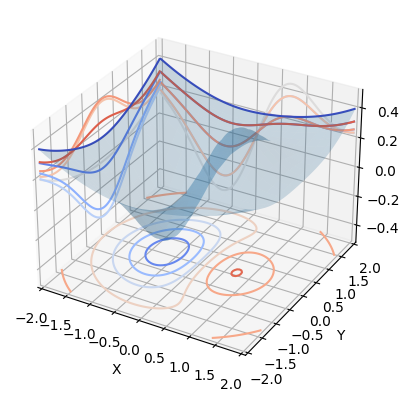

In [61]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm  # colormaps

min_val = -2
max_val = 2

ax = plt.figure().add_subplot(projection="3d")
x_axis = np.linspace(min_val, max_val, 100)
y_axis = np.linspace(min_val, max_val, 100)
X, Y = np.meshgrid(x_axis, y_axis, copy=False, indexing="xy")
Z = bowl_peak(X, Y)
# X, Y, Z = axes3d.get_test_data(0.05)
ax.plot_surface(X, Y, Z, rstride=5, cstride=5, alpha=0.2)
cset = ax.contour(X, Y, Z, zdir="z", offset=-0.5, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir="x", offset=min_val, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir="y", offset=max_val, cmap=cm.coolwarm)

ax.set_xlabel("X")
ax.set_xlim(min_val, max_val)
ax.set_ylabel("Y")
ax.set_ylim(min_val, max_val)
ax.set_zlabel("Z")
ax.set_zlim(-0.5, 0.5)

On voit que le minimum se trouve près de $[-\frac{1}{2}, 0]$. On va utiliser ce point pour initialiser l'optimisation.
On va tester différentes méthodes et comparer les sorties obtenues.

In [62]:
from scipy import optimize

x0 = np.array([-0.5, 0])
fun = lambda x: bowl_peak(x[0], x[1])
methods = ["Nelder-Mead", "CG", "BFGS", "Powell", "COBYLA", "L-BFGS-B"]
for m in methods:
    optim_res = optimize.minimize(fun, x0, method=m)
    print("---\nMethod:{}\n".format(m), optim_res, "\n")

---
Method:Nelder-Mead
        message: Optimization terminated successfully.
       success: True
        status: 0
           fun: -0.4052368582391728
             x: [-6.690e-01 -1.446e-04]
           nit: 20
          nfev: 38
 final_simplex: (array([[-6.690e-01, -1.446e-04],
                       [-6.691e-01, -1.814e-04],
                       [-6.690e-01, -2.011e-04]]), array([-4.052e-01, -4.052e-01, -4.052e-01])) 

---
Method:CG
  message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -0.40523687026669025
       x: [-6.691e-01 -5.670e-09]
     nit: 2
     jac: [ 1.863e-08  0.000e+00]
    nfev: 24
    njev: 8 

---
Method:BFGS
   message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -0.40523687025688715
        x: [-6.691e-01 -7.451e-09]
      nit: 6
      jac: [-6.083e-06  0.000e+00]
 hess_inv: [[ 5.287e-01 -4.836e-24]
            [-4.836e-24  1.000e+00]]
     nfev: 21
     njev: 7 

---
Method:Powell
  message: Opt

On trouve un minimum à $-0.4052$ en $[-0.669, 0.000]$ pour toutes les méthodes qui convergent. Notez le message de sortie de 'CG' qui signifie que le gradient ne varie plus assez. Personnellement, je ne trouve pas ce message de sortie très clair. Le point trouvé est bien l'optimum cherché pourtant. Notez aussi le nombre d'évaluations de la fonction (*nfev*) pour chaque méthode, et le nombre d'évaluation de gradient (*njev*) pour les méthodes qui reposent sur un calcul de gradient.

Remarquez aussi que si on relance *Anneal* plusieurs fois, on n'est pas assuré d'obtenir la même solution, puisqu'il s'agit d'une métaheuristique.

In [63]:
for i in range(4):
    optim_res = optimize.minimize(fun, x0, method="BFGS")
    print("---\nMethod:{} - Test:{}\n".format(m, i), optim_res, "\n")

---
Method:L-BFGS-B - Test:0
   message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -0.40523687025688715
        x: [-6.691e-01 -7.451e-09]
      nit: 6
      jac: [-6.083e-06  0.000e+00]
 hess_inv: [[ 5.287e-01 -4.836e-24]
            [-4.836e-24  1.000e+00]]
     nfev: 21
     njev: 7 

---
Method:L-BFGS-B - Test:1
   message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -0.40523687025688715
        x: [-6.691e-01 -7.451e-09]
      nit: 6
      jac: [-6.083e-06  0.000e+00]
 hess_inv: [[ 5.287e-01 -4.836e-24]
            [-4.836e-24  1.000e+00]]
     nfev: 21
     njev: 7 

---
Method:L-BFGS-B - Test:2
   message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -0.40523687025688715
        x: [-6.691e-01 -7.451e-09]
      nit: 6
      jac: [-6.083e-06  0.000e+00]
 hess_inv: [[ 5.287e-01 -4.836e-24]
            [-4.836e-24  1.000e+00]]
     nfev: 21
     njev: 7 

---
Method:L-BFGS-B - Tes

On va évaluer le temps de calcul nécessaire à chaque méthode.

In [64]:
for m in methods:
    print("Method:{}:".format(m))
    %timeit optim_res = optimize.minimize(fun, x0, method=m)
    print("############")

Method:Nelder-Mead:


776 µs ± 33.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
############
Method:CG:
1.51 ms ± 241 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
############
Method:BFGS:
1.65 ms ± 253 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
############
Method:Powell:
986 µs ± 327 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
############
Method:COBYLA:
157 µs ± 19 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
############
Method:L-BFGS-B:
716 µs ± 183 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
############


On peut aussi fournir des arguments supplémentaires à la fonction qu'on optimise. Par exemple, les données lorsque vous maximisez une log-vraissemblance. En voici un exemple: on considère une version rescaled de la fonction *bowl_peak*. Vous pourriez aussi utiliser une lambda fonction.

In [65]:
def shifted_scaled_bowlpeak(x, a, b, c):
    return (x[0] - a) * np.exp(-((x[0] - a) ** 2 + (x[1] - b) ** 2)) + (
        (x[0] - a) ** 2 + (x[0] - b) ** 2
    ) / c


a = 2
b = 3
c = 10
optim_res = optimize.minimize(
    shifted_scaled_bowlpeak, x0, args=(a, b, c), method="BFGS"
)
print(optim_res)
print("#######")
optim_res = optimize.minimize(
    lambda x: shifted_scaled_bowlpeak(x, a, b, c), x0, method="BFGS"
)
print(optim_res)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.05000000677266441
        x: [ 2.500e+00 -1.229e+00]
      nit: 23
      jac: [-9.918e-06  5.635e-08]
 hess_inv: [[ 1.407e+00 -1.579e+02]
            [-1.579e+02  7.174e+05]]
     nfev: 72
     njev: 24
#######
  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.05000000677266441
        x: [ 2.500e+00 -1.229e+00]
      nit: 23
      jac: [-9.918e-06  5.635e-08]
 hess_inv: [[ 1.407e+00 -1.579e+02]
            [-1.579e+02  7.174e+05]]
     nfev: 72
     njev: 24


Vous pouvez continuer ce petit benchmark en ajoutant le gradient et la hessienne... les calculs seront plus précis et plus rapides.

### Exercice 4: simulation, régression, estimation par maximisation de la vraisemblance

* On commence par simuler la variable $Y = 3 X_1 -2 X_2 +2 + \epsilon$ où $X_1,X_2,\epsilon \sim \mathcal{N}(0,1)$ 
* On souhaite ensuite retrouver les coefficients dans la [régression linéaire](http://fr.wikipedia.org/wiki/R%C3%A9gression_lin%C3%A9aire) de $Y$ sur $X_1$ et $X_2$ dans un modèle avec constante, par la méthode des Moindres Carrés Ordinaires. On rappelle que la forme matricielle de l'estimateur des MCO est $\hat{\beta} = (X'X)^{-1}X'Y$
* Enfin, $Y$ étant normale, on souhaite estimer ses paramètres par maximisation de vraisemblance:
    * La densité s'écrit: $f(x, \mu, \sigma) = \frac{1}{\sigma \sqrt{2\pi} } e^{ -\frac{(x-\mu)^2}{2\sigma^2} }$
    * La log-vraisemblance: $\ln\mathcal{L}(\mu,\sigma^2) = \sum_{i=1}^n \ln f(x_i;\,\mu,\sigma^2) = -\frac{n}{2}\ln(2\pi) - \frac{n}{2}\ln\sigma^2 - \frac{1}{2\sigma^2}\sum_{i=1}^n (x_i-\mu)^2$.
    * L'écriture des conditions au premier ordre donne une formule fermée pour les estimateurs du maximum de vraisemblance: $\hat{\mu} = \overline{x} \equiv \frac{1}{n}\sum_{i=1}^n x_i$, $\hat{\sigma}^2 = \frac{1}{n} \sum_{i=1}^n (x_i - \overline{x})^2$.
    * Vérifiez en les implémentant directement que vous trouvez bien la même solution que le minimum obtenu en utilisant [scipy.optimize.minimize](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) pour minimiser l'opposé de la log-vraissemblance.

### Références

* [100 numpy exercises](http://www.loria.fr/~rougier/teaching/numpy.100/)
* [Un tutoriel bien fait et très complet sur numpy](http://gael-varoquaux.info/scipy-lecture-notes/intro/numpy/index.html). L'un des auteurs n'est autre que Gaël Varoquaux qui sera présent pour la séance 3. Voir aussi la [partie optimisation](http://gael-varoquaux.info/scipy-lecture-notes/advanced/mathematical_optimization/index.html) 

## Eléments de réponses pour les exercices

### Exercice 1: Echiquier et Crible d'Erathosthene

* Exercice 1-A Echiquier: Créer une matrice échiquier (des 1 et des 0 alternés) de taille 8x8, de deux façons différentes
    * en vous servant de slices 
    * en vous servant de la fonction [tile](http://docs.scipy.org/doc/numpy/reference/generated/numpy.tile.html#numpy.tile)


In [66]:
import numpy as np

# Exo1a-1:
chess = np.zeros((8, 8), dtype=int)
chess[::2, ::2] = 1
chess[1::2, 1::2] = 1
print(chess)

# Exo1a-2:
chess2 = np.tile([[1, 0], [0, 1]], (4, 4))
print(chess2)

[[1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]]
[[1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]]


* Exercice 1-B Piège lors d'une extraction 2d:
    * Définir la matrice $M = \left(\begin{array}{ccccc} 1 & 5 & 9 & 13 & 17 \\ 2 & 6 & 10 & 14 & 18 \\ 3 & 7 & 11 & 15 & 19 \\ 4 & 8 & 12 & 16 & 20 \\ \end{array}\right)$
    * En **extraire** la matrice $\left(\begin{array}{ccc} 6 & 18 & 10 \\ 7 & 19 & 11 \\ 5 & 17 & 9 \\ \end{array}\right)$

In [67]:
# Exo1B:
M = np.arange(1, 21).reshape((4, 5), order="F")
print(M)

idx_row = [1, 2, 0]
idx_col = [1, 4, 2]
# the following line is wrong: it create couples from the two lists
print("WRONG:", M[idx_row, idx_col])
print("########")
# first correct way:
print(M[idx_row][:, idx_col])
# we can also use broadcasted indices to create all the couples we want:
idx = np.ix_(idx_row, idx_col)
print(idx)
print(M[idx])

[[ 1  5  9 13 17]
 [ 2  6 10 14 18]
 [ 3  7 11 15 19]
 [ 4  8 12 16 20]]
WRONG: [ 6 19  9]
########
[[ 6 18 10]
 [ 7 19 11]
 [ 5 17  9]]
(array([[1],
       [2],
       [0]]), array([[1, 4, 2]]))
[[ 6 18 10]
 [ 7 19 11]
 [ 5 17  9]]


* Exercice 1-C Crible d'Erathosthene: On souhaite implémenter un [crible d'Erathosthène](http://fr.wikipedia.org/wiki/Crible_d'%C3%89ratosth%C3%A8ne) pour trouver les nombres premiers inférieurs à $N=1000$.
    * partir d'un array de booléens de taille N+1, tous égaux à True.
    * Mettre 0 et 1 à False car ils ne sont pas premiers
    * pour chaque entier $k$ entre 2 et $\sqrt{N}$: 
        * si $k$ est premier: on passe ses multiples (entre $k^2$ et $N$) à False
    * on print la liste des entiers premiers

In [68]:
# Exo1c
n = 1001
is_prime = np.ones(n, dtype=bool)
is_prime[:2] = False

for k in range(2, int(np.sqrt(n)) + 1):
    is_prime[k**2 :: k] = False
print(np.arange(n)[is_prime])

[  2   3   5   7  11  13  17  19  23  29  31  37  41  43  47  53  59  61
  67  71  73  79  83  89  97 101 103 107 109 113 127 131 137 139 149 151
 157 163 167 173 179 181 191 193 197 199 211 223 227 229 233 239 241 251
 257 263 269 271 277 281 283 293 307 311 313 317 331 337 347 349 353 359
 367 373 379 383 389 397 401 409 419 421 431 433 439 443 449 457 461 463
 467 479 487 491 499 503 509 521 523 541 547 557 563 569 571 577 587 593
 599 601 607 613 617 619 631 641 643 647 653 659 661 673 677 683 691 701
 709 719 727 733 739 743 751 757 761 769 773 787 797 809 811 821 823 827
 829 839 853 857 859 863 877 881 883 887 907 911 919 929 937 941 947 953
 967 971 977 983 991 997]


On remarque que le nombre 6 est barré deux fois car il est multiple de 3 et de 2. Cela signifie que le nombre 6 est barré durant les deux premières itérations. En fait chaque nombre ``k*i`` est nécessaire barré dans une précédente itération si ``i<k``. On remplace donc ``k*i`` par ``k*k`` ou ``k**2``.

In [69]:
# Exo1c
import numpy as np

n = 1001
is_prime = np.ones(n, dtype=bool)
is_prime[:2] = False
for k in range(2, int(np.sqrt(n))):
    is_prime[k * k :: k] = False
print(np.arange(n)[is_prime])

[  2   3   5   7  11  13  17  19  23  29  31  37  41  43  47  53  59  61
  67  71  73  79  83  89  97 101 103 107 109 113 127 131 137 139 149 151
 157 163 167 173 179 181 191 193 197 199 211 223 227 229 233 239 241 251
 257 263 269 271 277 281 283 293 307 311 313 317 331 337 347 349 353 359
 367 373 379 383 389 397 401 409 419 421 431 433 439 443 449 457 461 463
 467 479 487 491 499 503 509 521 523 541 547 557 563 569 571 577 587 593
 599 601 607 613 617 619 631 641 643 647 653 659 661 673 677 683 691 701
 709 719 727 733 739 743 751 757 761 769 773 787 797 809 811 821 823 827
 829 839 853 857 859 863 877 881 883 887 907 911 919 929 937 941 947 953
 961 967 971 977 983 991 997]


### Exercice 2 : marches aléatoires

Simulez (**en une seule fois!**) 10000 marches aléatoires de taille 1000, partant de 0 et de pas +1 ou -1 équiprobables 

* Faites un graphe représentant la racine de la moyenne des carrés des positions (=cumul des pas à un instant donné) en fonction du temps
* Quels sont les amplitudes maximales et minimales atteintes parmi l'ensemble des marches aléatoires?
* Combien de marches s'éloigne de plus de 50 de l'origine?
* Parmi celles qui le font, quelle est la moyenne des temps de passage (i.e. le premier moment où ces marches dépassent +/-50)?

Vous aurez peut-être besoin des fonctions suivantes: [np.abs](https://numpy.org/doc/stable/reference/generated/numpy.absolute.html), [np.mean](https://numpy.org/doc/stable/reference/generated/numpy.mean.html), [np.max](https://numpy.org/doc/stable/reference/generated/numpy.max.html), [np.where](https://numpy.org/doc/stable/reference/generated/numpy.where.html), [np.argmax](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html), [np.any](http://docs.scipy.org/doc/numpy/reference/generated/numpy.any.html), [np.cumsum](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html), [np.random.randint](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html).

In [70]:
import numpy as np

n_walks = 10000
n_steps = 1000
steps = np.random.randint(0, 2, (n_walks, n_steps))
steps = 2 * steps - 1
walks = np.cumsum(steps, axis=1)

# on affiche le premier carré 10x10
walks[:10, :10]

array([[ 1,  0,  1,  2,  3,  2,  1,  0,  1,  2],
       [ 1,  0, -1, -2, -1, -2, -1,  0, -1,  0],
       [ 1,  2,  3,  4,  5,  6,  5,  6,  5,  4],
       [-1,  0,  1,  0, -1, -2, -1,  0, -1, -2],
       [-1,  0,  1,  2,  3,  2,  3,  2,  1,  0],
       [-1,  0,  1,  2,  3,  4,  3,  4,  3,  2],
       [ 1,  2,  1,  2,  1,  0,  1,  2,  1,  2],
       [ 1,  2,  3,  4,  5,  4,  3,  2,  3,  4],
       [ 1,  0, -1, -2, -3, -2, -3, -2, -1,  0],
       [ 1,  2,  1,  2,  3,  2,  3,  4,  3,  4]])

Highest position:122	Lowest position:-150
Number of walks over bound(=50):2128
Mean crossing time:682.6531954887218


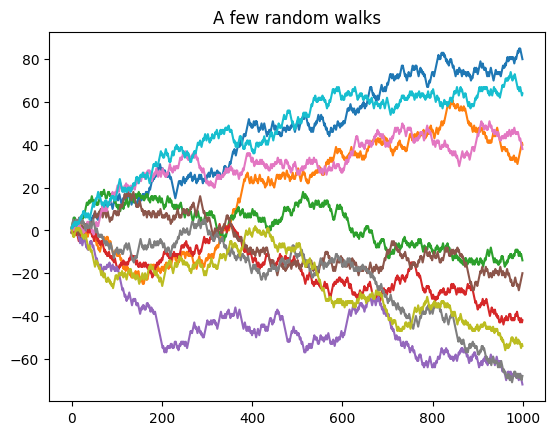

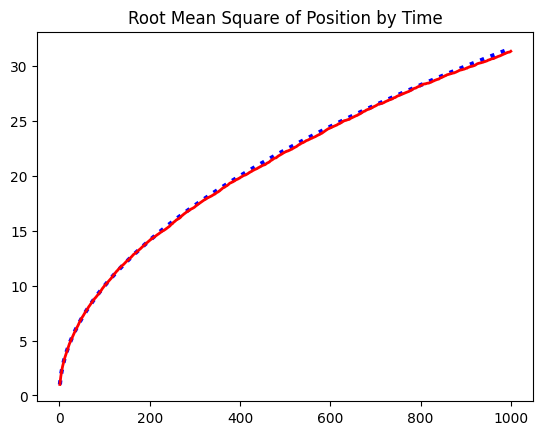

In [71]:
# let's have a quick look at a few random walks
plt.plot(walks[:10, :].transpose())
plt.title("A few random walks")
# Let's see how the root mean square of the position evolves with time/nb of steps
rms_position = np.sqrt((walks**2).mean(axis=0))
plt.figure()
t = 1 + np.arange(len(rms_position))
plt.plot(t, np.sqrt(t), ":b", lw=3)  # Just to show the fit
plt.plot(t, rms_position, "-r", lw=2)
plt.title("Root Mean Square of Position by Time")
# What are the highest/lowest positions
print(
    "Highest position:{max}\tLowest position:{min}".format(
        max=walks.max(), min=walks.min()
    )
)
# How many walks wander further than 50?
bound = 50
hits_the_bound = np.any(
    np.abs(walks) > bound, axis=1
)  # for each walk, do we go further than the bound at any time?
print("Number of walks over bound(={}):{}".format(bound, hits_the_bound.sum()))
# Among the walks that go beyond the bound, what is the mean of the first hits?
# we use argmax on the boolean array to get the first True value
first_hits = (np.abs(walks[hits_the_bound, :]) > bound).argmax(axis=1)
print("Mean crossing time:{}".format(first_hits.mean()))

### Exercice 3 : retrouver la série aléatoire à partir des marches aléatoires

Dans cet exercice, on cherche à retrouver la série initiale à partir de la somme cumulée de celle-ci. On veut calculer en quelque sort sa dérivée.

In [72]:
derivee = walks[:, 1:] - walks[:, :-1]
derivee[:10, :10]

array([[-1,  1,  1,  1, -1, -1, -1,  1,  1, -1],
       [-1, -1, -1,  1, -1,  1,  1, -1,  1, -1],
       [ 1,  1,  1,  1,  1, -1,  1, -1, -1,  1],
       [ 1,  1, -1, -1, -1,  1,  1, -1, -1,  1],
       [ 1,  1,  1,  1, -1,  1, -1, -1, -1,  1],
       [ 1,  1,  1,  1,  1, -1,  1, -1, -1, -1],
       [ 1, -1,  1, -1, -1,  1,  1, -1,  1,  1],
       [ 1,  1,  1,  1, -1, -1, -1,  1,  1,  1],
       [-1, -1, -1, -1,  1, -1,  1,  1,  1,  1],
       [ 1, -1,  1,  1, -1,  1,  1, -1,  1, -1]])

### Exercice 4 : simulation, régression, estimation par maximisation de la vraisemblance

* On commence par simuler la variable $Y = 3 X_1 -2 X_2 +2 + \epsilon$ où $X_1,X_2,\epsilon \sim \mathcal{N}(0,1)$ 
* On souhaite ensuite retrouver les coefficients dans la [régression linéaire](http://fr.wikipedia.org/wiki/R%C3%A9gression_lin%C3%A9aire) de $Y$ sur $X_1$ et $X_2$ dans un modèle avec constante, par la méthode des Moindres Carrés Ordinaires. On rappelle que la forme matricielle de l'estimateur des MCO est $\hat{\beta} = (X'X)^{-1}X'Y$
* Enfin, $Y$ étant normale, on souhaite estimer ses paramètres par maximisation de vraisemblance:
    * La densité s'écrit: $f(x, \mu, \sigma) = \frac{1}{\sigma \sqrt{2\pi} } e^{ -\frac{(x-\mu)^2}{2\sigma^2} }$
    * La log-vraisemblance: $\ln\mathcal{L}(\mu,\sigma^2) = \sum_{i=1}^n \ln f(x_i;\,\mu,\sigma^2) = -\frac{n}{2}\ln(2\pi) - \frac{n}{2}\ln\sigma^2 - \frac{1}{2\sigma^2}\sum_{i=1}^n (x_i-\mu)^2$ ou encore en divisant par $n$ : $-\frac{1}{2}\ln(2\pi) - \frac{1}{2}\ln\sigma^2 - \frac{1}{2n\sigma^2}\sum_{i=1}^n (x_i-\mu)^2$
    * L'écriture des conditions au premier ordre donne une formule fermée pour les estimateurs du maximum de vraisemblance: $\hat{\mu} = \overline{x} \equiv \frac{1}{n}\sum_{i=1}^n x_i$, $\hat{\sigma}^2 = \frac{1}{n} \sum_{i=1}^n (x_i - \overline{x})^2$.
    * Vérifiez en les implémentant directement que vous trouvez bien la même solution que le minimum obtenu en utilisant *scipy.optimize.minimize* pour minimiser l'opposé de la log-vraissemblance.
    
**version matricielle**

In [73]:
import numpy as np
import math
from scipy.optimize import minimize

n_samples = 100000
x1_x2_eps = np.random.randn(n_samples, 3)
y = 3 * x1_x2_eps[:, 0] - 2 * x1_x2_eps[:, 1] + 2 + x1_x2_eps[:, 2]

X = np.hstack((x1_x2_eps[:, :2], np.ones((n_samples, 1))))
beta_hat = (np.linalg.inv((X.T).dot(X))).dot((X.T).dot(y))
print("coef X1, coef X2, constante")
beta_hat

coef X1, coef X2, constante


array([ 2.99916948, -1.99956892,  2.00239409])

**version scipy**

In [74]:
def log_likelihood(mu, sigma_square, x):
    return -0.5 * math.log(sigma_square) - sum((x - mu) ** 2) / (
        2 * sigma_square
    ) / len(x)


def neg_log_likelihood_vectorielle(theta):
    return -log_likelihood(theta[0], theta[1], y)


theta0 = np.array([2.0, 14])
optim_res = minimize(neg_log_likelihood_vectorielle, theta0, method="Nelder-Mead")
optim_res

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 1.8178263051875772
             x: [ 1.991e+00  1.395e+01]
           nit: 31
          nfev: 61
 final_simplex: (array([[ 1.991e+00,  1.395e+01],
                       [ 1.991e+00,  1.395e+01],
                       [ 1.991e+00,  1.395e+01]]), array([ 1.818e+00,  1.818e+00,  1.818e+00]))

Est-ce bien le résultat attendu :

* $\mathbb{E}Y = 3\mathbb{E}X_1 - 2\mathbb{E}X_2 + 2 + \mathbb{E}\epsilon = 2$
* $\mathbb{V}Y = 9\mathbb{V}X_1 + 4\mathbb{V}X_2 + \mathbb{V}\epsilon = 14$

Toutes les variables sont indépendantes. On vérifie que cela correspond aux réponses cherchées :

In [75]:
np.mean(y), np.std(y) ** 2

(1.990866893336447, 13.952414983319736)